# Bike Rentals - Multiple Linear Regression

BoomBikes, a US-based bike-sharing provider, has been struggling with significant revenue drops due to the COVID-19 pandemic. To recover and accelerate their growth once the lockdown ends, BoomBikes aims to understand the factors affecting bike demand. The goal is to develop a predictive model to help the management adjust their business strategy to meet customer demand and identify opportunities in new markets.

## Contents
1. [Problem Statement](#problem-statement)
2. [Business Goal](#business-goal)
3. [Initial Steps](#initial-steps)
    * [Import Required Libraries and Configure Default Settings](#import-required-libraries-and-configure-default-settings)
    * [Read the Dataset](#read-the-dataset)
    * [Rename Columns](#rename-columns)
4. [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
    * [Analyse the Columns and Empty Columns Check](#analyse-the-columns-and-empty-columns-check)
    * [Single Valued Columns Check](#single-valued-columns-check)
    * [Parsing Date Column](#parsing-date-column)
5. [Sanity Checks](#sanity-checks)
    * [Total Count Mismatch Check](#total-count-mismatch-check)
    * [Year Mismatch Check](#year-mismatch-check)
    * [Month Mismatch Check](#month-mismatch-check)
        * [Changing Numeric Month Values to Corresponding Month Names](#changing-numeric-month-values-to-their-corresponding-month-names)
    * [Weekday Mismatch Check](#weekday-mismatch-check)
    * [WorkingDay Mismatch Check](#workingday-mismatch-check)
    * [Season Mismatch Check](#season-mismatch-check)
        * [Changing Numeric Season Values to Corresponding Season Names](#changing-numeric-season-values-to-their-corresponding-season-names)
        * [Visualize Season to Identify Mismatch](#visualize-season-to-identify-mismatch)
    * [Changing Remaining Numeric Categorical Values to Corresponding Labels](#changing-remaining-numeric-categorical-values-to-their-corresponding-labels)
    * [Dropping Redundant and Not Useful Columns](#dropping-redundant-and-not-useful-columns)
    * [Outlier Handling](#outlier-handling)
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    * [Derived Metrics](#derived-metrics)
        * [Quarter (Type Driven Derived Metrics)](#quarter-type-driven-derived-metrics)
        * [Is High Windspeed? (Business Driven Derived Metrics)](#is-high-windspeed-business-driven-derived-metrics)
        * [Is High Humidity? (Business Driven Derived Metrics)](#is-high-humidity-business-driven-derived-metrics)
    * [Univariate and Bivariate Analysis (Numerical Features)](#univariate-and-bivariate-analysis-numerical-features)
    * [Bivariate Analysis (Categorical Features)](#bivariate-analysis-categorical-features)
7. [Multiple Linear Regression](#multiple-linear-regression)
    * [Dummies](#dummies)
    * [Splitting the Dataset into Training and Test Sets](#splitting-the-dataset-into-training-and-test-sets)
    * [Scaling](#scaling)
    * [Linear Regression Models](#linear-regression-models)
        * [Recursive Feature Elimination (RFE)](#recursive-feature-elimination-rfe)
        * [Model 1 (RFE)](#model-1-rfe)
        * [Model 2](#model-2)
        * [Model 3](#model-3)
        * [Model 4](#model-4)
        * [Model 5](#model-5)
        * [Model 6](#model-6)
    * [Residual Analysis](#residual-analysis)
    * [Transforming Test Dataset](#transforming-test-dataset)
    * [Making Predictions](#making-predictions)
    * [R Squared Analysis](#r-squared-analysis)
    * [Visualizing Test Predictions](#visualizing-test-predictions)
8. [Major Insights from the Model](#major-insights-from-the-model)
9. [Suggested Next Business Steps](#suggested-next-business-steps)


## Problem Statement
Bike-sharing systems provide bikes for short-term use, either for a fee or free, through computer-controlled docks. BoomBikes, a provider affected by the pandemic, is exploring ways to rebound by understanding the demand for shared bikes post-lockdown. They have gathered data on various factors influencing daily bike demand in the US market and seek to know:

1. Which variables significantly predict bike demand.
2. How well these variables explain the bike demand.


The objective is to use this analysis to adjust their business strategy and improve their market positioning.



## Business Goal

The main objective is to model the demand for shared bikes using the available independent variables. This model will help management understand how different features affect demand, allowing them to refine their strategy to align with customer needs. Additionally, it will provide insights into demand dynamics in new markets.

---
---
## Initial Steps

### Import Required Libraries and Configure Default Settings

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
# Display plots inline in Jupyter notebooks (added just for ensuring compatibility; may not be required)
%matplotlib inline 

In [3]:
# Remove Max Limit of Rows and Columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Read the dataset

In [4]:
#read the dataset and check the first 10 rows
bike_sharing_dataset = pd.read_csv("day.csv", low_memory=False)
bike_sharing_dataset.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
#Check the shape of the initial dataframe
print('Initial shape of dataframe: ', bike_sharing_dataset.shape)

Initial shape of dataframe:  (730, 16)


### Rename Columns

In [6]:
# Rename the specified columns
# We will anyways drop instant later, so not renaming it.
bike_sharing_dataset.rename(columns = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

---
---
## Data Cleaning and Manipulation

### Analyse the columns and empty columns check

In [7]:
bike_sharing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   date                    730 non-null    object 
 2   season                  730 non-null    int64  
 3   year                    730 non-null    int64  
 4   month                   730 non-null    int64  
 5   holiday                 730 non-null    int64  
 6   weekday                 730 non-null    int64  
 7   workingday              730 non-null    int64  
 8   weather_situation       730 non-null    int64  
 9   temperature             730 non-null    float64
 10  feels_like_temperature  730 non-null    float64
 11  humidity                730 non-null    float64
 12  windspeed               730 non-null    float64
 13  casual                  730 non-null    int64  
 14  registered              730 non-null    in

<div class="alert alert-block alert-success">There is no null/empty values in any columns.</div>

In [8]:
bike_sharing_dataset.describe()

,instant,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Single valued columns check

In [9]:
#all columns having only single values
single_valued_columns = bike_sharing_dataset.loc[:, bike_sharing_dataset.nunique() == 1].columns #Get all the columns that has only single value
print(single_valued_columns)

Index([], dtype='object')


<div class="alert alert-block alert-success">There is no single valued columns in our dataset.</div>

### Parsing Date column

In [10]:
# Correctly parse 'date' column
bike_sharing_dataset['date'] = pd.to_datetime(bike_sharing_dataset['date'], format='%d-%m-%Y')
bike_sharing_dataset.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Sanity Checks

#### Total Count Mismatch Check

In [11]:
#Total Count = Casual + Registered
mismatch_count = (bike_sharing_dataset.casual + bike_sharing_dataset.registered != bike_sharing_dataset.total_count).sum()
print('Records with total count mismatch: ', mismatch_count)

Records with total count mismatch:  0


<div class="alert alert-block alert-success">There is no mismatch in Total Count.</div>

#### Year Mismatch Check

In [12]:
# Year = {2018: 0, 2019: 1}
year_mismatch = bike_sharing_dataset['year'] != bike_sharing_dataset['date'].dt.year.map({2018: 0, 2019: 1})
print('Records with year mismatch: ', year_mismatch.sum())

Records with year mismatch:  0


<div class="alert alert-block alert-success">There is no mismatch in Year.</div>

#### Month Mismatch Check

In [13]:
# Month is matching with the date column
month_mismatch = bike_sharing_dataset['month'] != bike_sharing_dataset['date'].dt.month
print('Records with month mismatch: ', month_mismatch.sum())


Records with month mismatch:  0


<div class="alert alert-block alert-success">There is no mismatch in Month.</div>

#### Changing Numeric month values to their corresponding month names

In [14]:
# Convert the numeric month values to their corresponding month names
bike_sharing_dataset['month'] = bike_sharing_dataset['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
bike_sharing_dataset['month'].unique()


array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

#### Weekday Mismatch Check

In [15]:
# Is Weekday matching with the date column
weekday_mismatch = bike_sharing_dataset['weekday'] != bike_sharing_dataset['date'].dt.weekday
print('Records with weekday mismatch: ', weekday_mismatch.sum())

Records with weekday mismatch:  424


<div class="alert alert-block alert-danger">There is 424 record mismatch in WeekDay. Let's analyse WeekDay further.</div>

In [16]:
bike_sharing_dataset[weekday_mismatch].head(14) #To check atleast 2 weeks records, inorder to identify pattern

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,Jan,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,Jan,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,Jan,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,Jan,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,Jan,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


<div class="alert alert-block alert-success">
<b>Pattern:</b> <br>
- There's definitely a discrepancy in the dataset for the "weekday" column. Some rows follow the format where Monday = 6, Sunday = 5,....<br>while others use the ISO standard (Monday = 0,...., Sunday = 6). <br> 
- Currently, the "working day" syncs with this inconsistent "weekday" column, treating 0 and 6 as the weekend, which aligns with the US standard (Sunday = 0,...., Saturday = 6). <br> 
- We'll correct the "weekday" column to follow the US standard.
</div>

In [17]:
# Converting weekday to correct weekday derive from dteday (US Standard) - (Sunday = 0, ...., Saturday = 6)
bike_sharing_dataset['weekday'] = (bike_sharing_dataset['date'].dt.weekday + 1) % 7
bike_sharing_dataset.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,Jan,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,Jan,0,2,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### WorkingDay Mismatch Check

<div class="alert alert-block alert-danger">Since, `workingday` earlier was synced with inconsistent `weekday`. Let's sync with our updated and corrected `weekday` column.</div>

In [18]:
#WorkingDay = Neither a weekend nor a holiday
bike_sharing_dataset['workingday'] = bike_sharing_dataset.apply(lambda row: 1 if (row['weekday'] not in [0, 6] and row['holiday'] == 0) else 0, axis=1)
bike_sharing_dataset.head(14) #To check atleast 2 weeks records, inorder to identify pattern

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,1,0,Jan,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,1,0,Jan,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,1,0,Jan,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,1,0,Jan,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,1,0,Jan,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


#### Season Mismatch Check

#### Changing Numeric Season values to their corresponding Season names

In [19]:
#Let's change label of season
bike_sharing_dataset['season'] = bike_sharing_dataset['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike_sharing_dataset['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

#### Visualize Season to identify mismatch

In [20]:
#Function to plot bar graph
def plot_bar_graph(dataframe,x_axis,y_axis,xlabel,ylabel,title):
    plt.figure(figsize=(8, 6))
    palette = sns.color_palette("husl", len(bike_sharing_dataset[x_axis].unique())) # Color Palette
    barplot = sns.barplot(x=x_axis, y=y_axis, data=dataframe, hue=x_axis, palette=palette, dodge=False, legend=False) #Bar Plot
    # Annotate each bar with the temperature value
    for index, row in dataframe.iterrows():
        barplot.text(index, row[y_axis], round(row[y_axis], 2), color='black', ha="center")

    plt.xlabel(xlabel) #x axis label
    plt.ylabel(ylabel) #y axis label
    plt.title(title) #title
    plt.show()

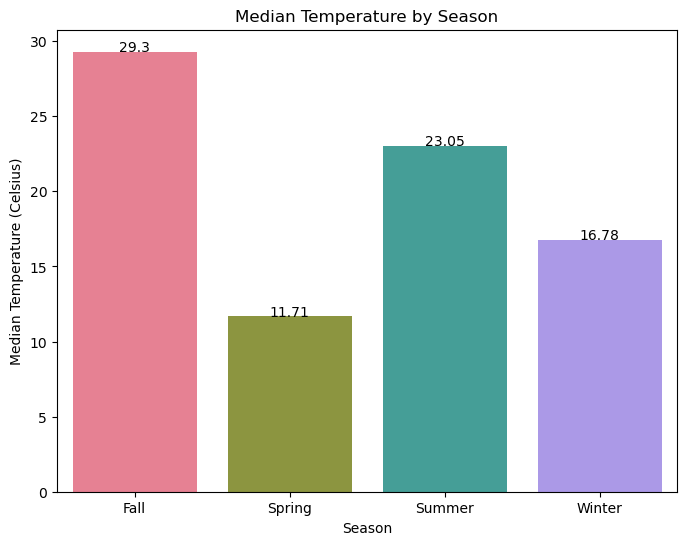

In [21]:
# Calculate the median temperature for each season
season_temp_avg = bike_sharing_dataset.groupby('season')['temperature'].median().reset_index()

# Plot the median temperature for each season to visualize the correlation
plot_bar_graph(dataframe = season_temp_avg, x_axis = 'season', y_axis = 'temperature', xlabel = 'Season', 
               ylabel = 'Median Temperature (Celsius)', title = 'Median Temperature by Season')


<div class="alert alert-block alert-danger">
We can see that seasons are not properly aligned.<br>
1. Temperature for Fall is higher than that of Summer.<br>
2. In general, the temperature of Spring is expected to be higher than that of Winter.<br>

Let's check further.
</div>

In [22]:
# Group by season and get the unique months for each season
season_month_range = bike_sharing_dataset.groupby('season')['month'].unique().reset_index()
# Rename columns for clarity
season_month_range.columns = ['Season', 'Months']
season_month_range


,Season,Months
0,Fall,"[Jun, Jul, Aug, Sep]"
1,Spring,"[Jan, Feb, Mar, Dec]"
2,Summer,"[Mar, Apr, May, Jun]"
3,Winter,"[Sep, Oct, Nov, Dec]"


<div class="alert alert-block alert-success">
Generally, Expected Seasons in  USA are:
- Spring : March to May  <br>
- Summer : June to August <br>
- Fall : September to November <br>
- Winter : December to February <br>

After closing observing dataset, above graph and pivot, we need to change labels as below.
- Spring to Winter <br>
- Summer to Spring <br>
- Fall to Summer <br> 
- Winter to Fall <br> 
</div>

In [23]:
# correcting the labels
bike_sharing_dataset['season'] = bike_sharing_dataset['season'].map({'Spring':'Winter','Summer':'Spring','Fall':'Summer','Winter':'Fall'})

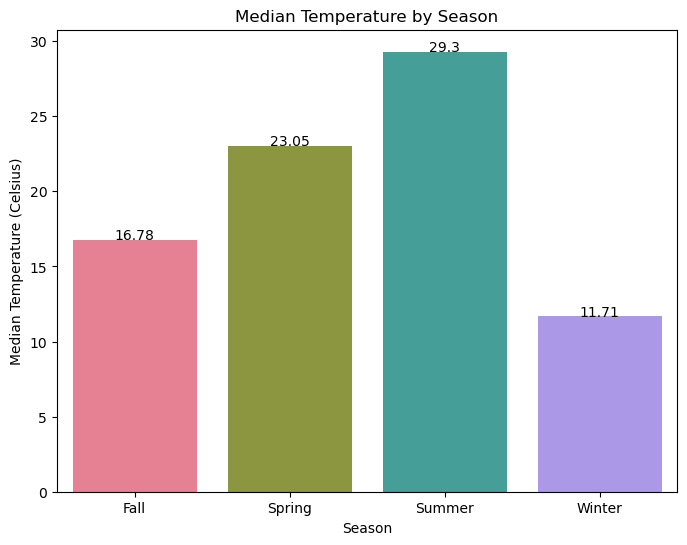

In [24]:
# Calculate the median temperature for each season
season_temp_avg = bike_sharing_dataset.groupby('season')['temperature'].median().reset_index()

# Plot the median temperature for each season to visualize
plot_bar_graph(dataframe = season_temp_avg, x_axis = 'season', y_axis = 'temperature', xlabel = 'Season', 
               ylabel = 'Median Temperature (Celsius)', title = 'Median Temperature by Season')


<div class="alert alert-block alert-success">
We can see that seasons are now properly aligned.<br>
</div>

#### Changing Remaining Numeric categorical values to their corresponding labels

In [25]:
#Weekday Labels
bike_sharing_dataset['weekday']=bike_sharing_dataset['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [26]:
#Weather Situation Labels
bike_sharing_dataset['weather_situation']=bike_sharing_dataset['weather_situation'].map(
    {1: 'Clear/Partly Cloudy',2:'Mist/Cloudy',3:'Light Precipitation/Thunderstorms',4:'Severe Weather'})


In [27]:
bike_sharing_dataset.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,Winter,0,Jan,0,Mon,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Winter,0,Jan,0,Tue,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Winter,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Winter,0,Jan,0,Thu,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Winter,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping redundant and not useful columns


<div class="alert alert-block alert-danger">
Columns to be removed: <br>
1. instant: Serial Number (Not useful) <br>
2. date: We have all the useful extracted columns like month, year and weekday. <br>
3. Since, total_count = casual + registered. To avoid Multicollinearity, we will remove casual and registered columns <br>
</div> 

In [28]:
#Droping the columns that are not useful or redundant
bike_sharing_dataset.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [29]:
bike_sharing_dataset.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,total_count
0,Winter,0,Jan,0,Mon,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Winter,0,Jan,0,Tue,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Winter,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Winter,0,Jan,0,Thu,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Winter,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Outlier Handling

In [30]:
#Get all numeric columns excluding 'total_count' as it is target variable
numeric_feature_columns = bike_sharing_dataset.select_dtypes(include=['number']).columns.to_list()
numeric_feature_columns.remove('total_count')
numeric_feature_columns

['year',
 'holiday',
 'workingday',
 'temperature',
 'feels_like_temperature',
 'humidity',
 'windspeed']

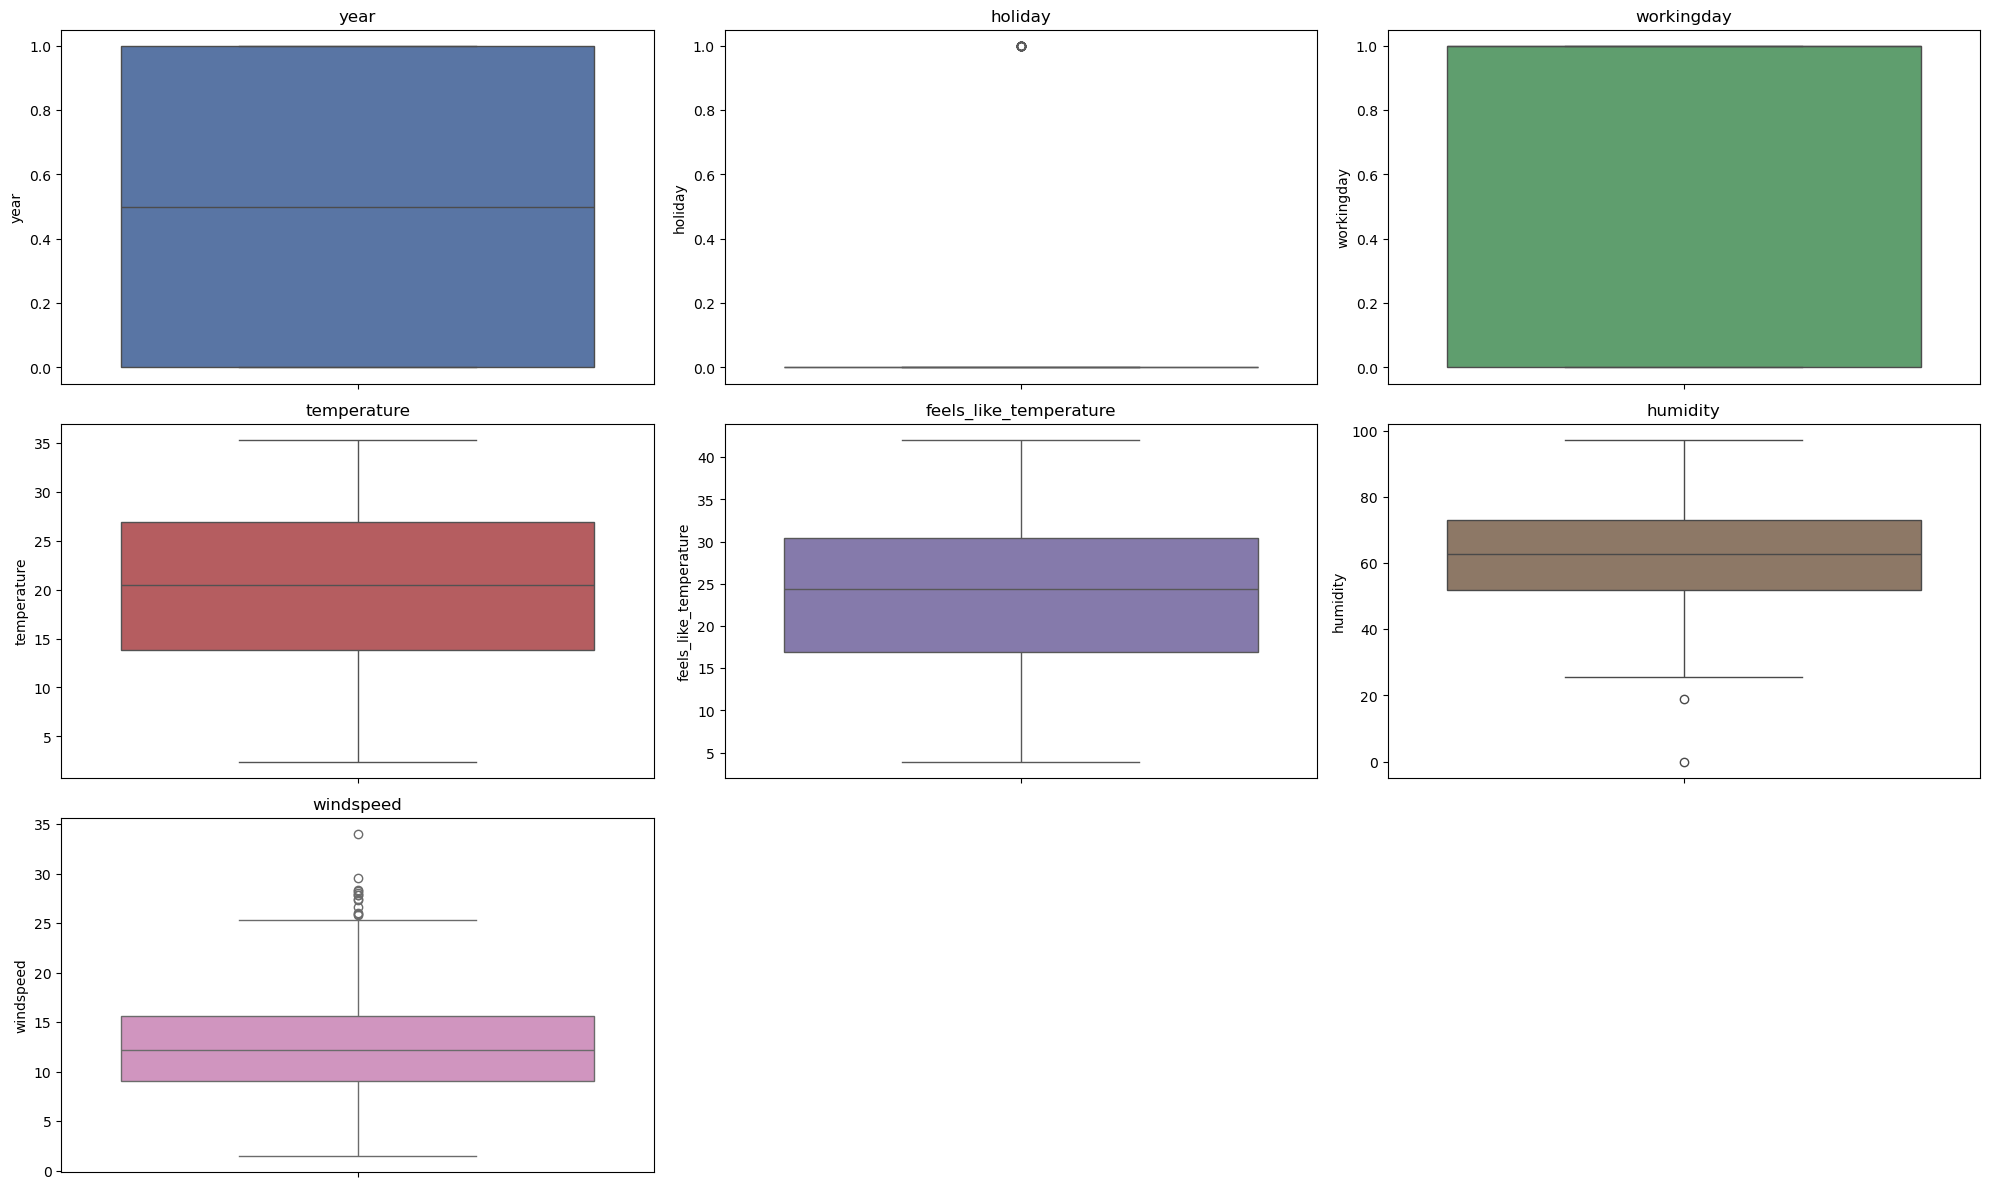

In [31]:
plt.figure(figsize=(20, 12)) # Set the size of the entire figure
palette = sns.color_palette("deep", len(numeric_feature_columns))

# Generate boxplot for each numeric feature in the dataset
for index, numeric_feature_column in enumerate(numeric_feature_columns):
    plt.subplot(3,3,index + 1)
    sns.boxplot(y = bike_sharing_dataset[numeric_feature_column], color=palette[index % len(palette)])
    plt.title(f'{numeric_feature_column}')
    
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Analysis:</b><br>
1. For humidity, there is some record with 0% humidity, which is extremely rare.<br>
2. Since, windspeed has acceptable range and higher windspeed can denote extreme weather condition which is important for our analysis. We will retain the outliers.<br>
</div>

In [32]:
#Removing 1 row with humidity as 0%, as there is high chances of erroneous data
bike_sharing_dataset = bike_sharing_dataset[bike_sharing_dataset['humidity'] > 0]
bike_sharing_dataset.shape

(729, 12)

---
---
## Exploratory Data Analysis (EDA)

### Derived Metrics

#### quarter (Type driven Derived Metrics)

In [33]:
# Creating derived features

# Quarter: Dividing the year into quarters based on the month
bike_sharing_dataset['quarter'] = bike_sharing_dataset['month'].map({
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
})

#### Is high windspeed? (Business driven Derived Metrics)

In [34]:
# is_high_windspeed: Flag for high windspeed (windspeed > 20 m/s)
bike_sharing_dataset['is_high_windspeed'] = bike_sharing_dataset['windspeed'].apply(lambda x: 1 if x > 20 else 0)

#### Is high humidity? (Business driven Derived Metrics)

In [35]:
# is_high_humidity: Flag for high humidity (humidity > 90%)
bike_sharing_dataset['is_high_humidity'] = bike_sharing_dataset['humidity'].apply(lambda x: 1 if x > 90 else 0)

In [36]:
# Display the first few rows to confirm the new features
bike_sharing_dataset.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temperature,feels_like_temperature,humidity,windspeed,total_count,quarter,is_high_windspeed,is_high_humidity
0,Winter,0,Jan,0,Mon,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985,Q1,0,0
1,Winter,0,Jan,0,Tue,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801,Q1,0,0
2,Winter,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349,Q1,0,0
3,Winter,0,Jan,0,Thu,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562,Q1,0,0
4,Winter,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600,Q1,0,0


### Univariate and Bivariate Analysis (Numerical Features)

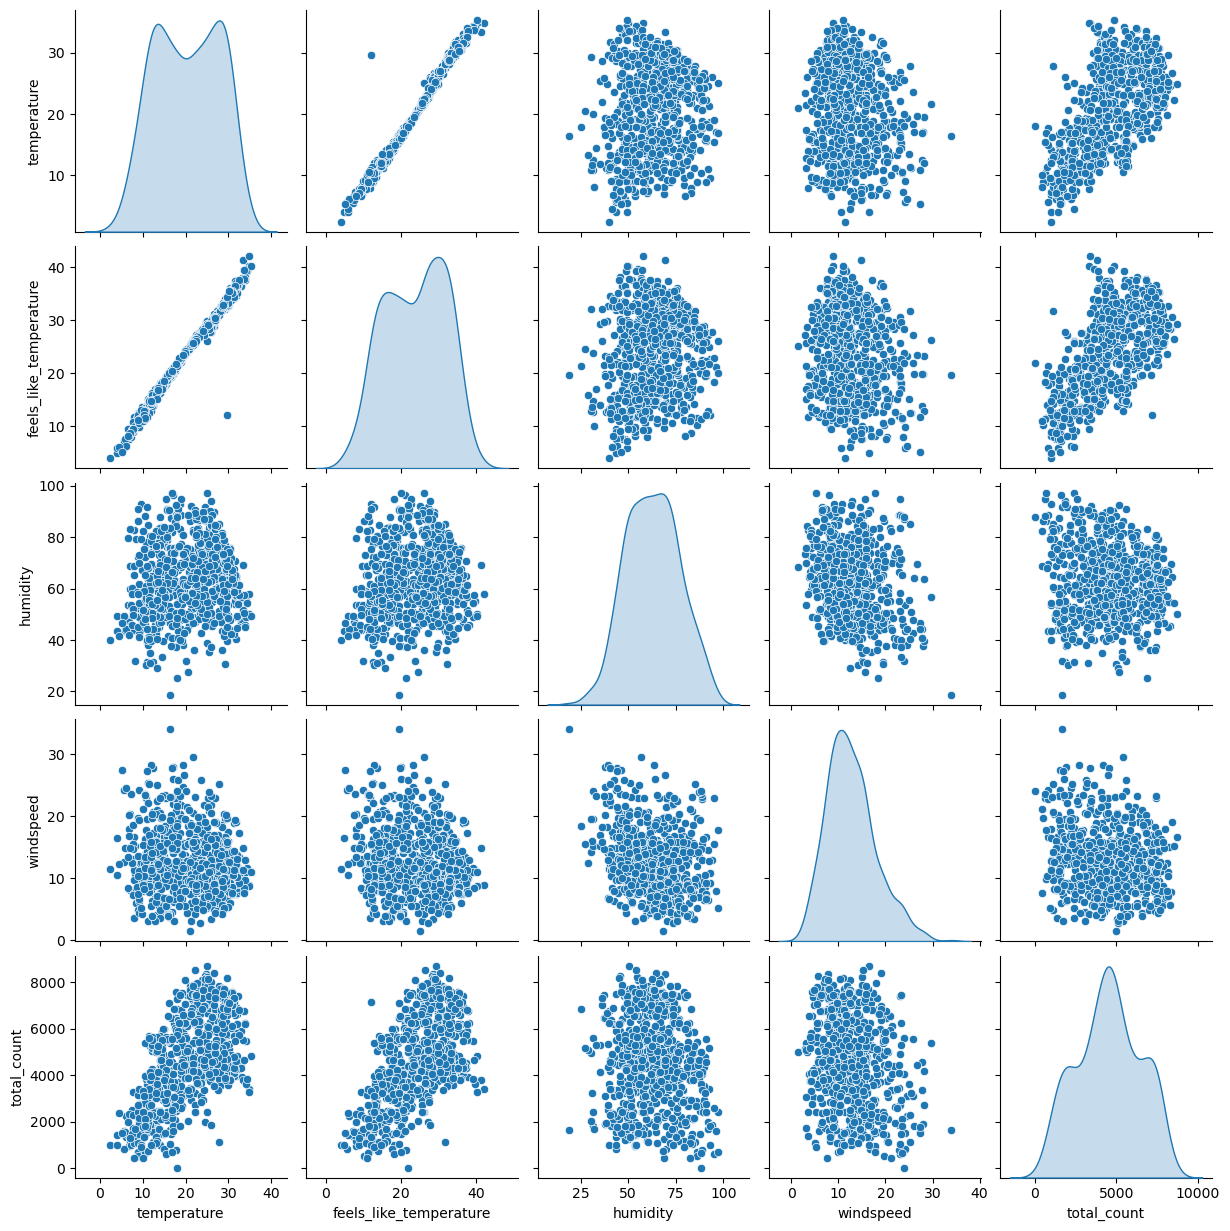

In [37]:
#(Non Categorical) Numeric variable pair plot
sns.pairplot(bike_sharing_dataset[['temperature','feels_like_temperature','humidity','windspeed','total_count']], diag_kind='kde')
plt.show()

<div class="alert alert-block alert-success">

Analysis based on the pair plot:

1. **Strong Correlation - Bivariate Analysis**:
   - **Temperature & Feels Like Temperature**: Almost perfectly correlated.
   - **Temperature/Feels Like Temperature & Total Count**: Higher temperatures generally lead to more bike rentals.

2. **Weaker Relationships - Bivariate Analysis**:
   - **Humidity & Total Count**: No clear pattern, indicating a weak relationship.
   - **Windspeed & Total Count**: Slight negative impact. Higher windspeed may slightly reduce bike rentals.

3. **Distribution Insights - Univariate Analysis**:
   - **Temperature**: Has 2 peaks, so it is not Normally distributed.
   - **Windspeed**: Right-skewed, with most values on the lower side.
   - **humidity**: Normally distributed.

We should focus on **temperature** for further analysis or modeling, as they show the strongest relationship with bike rentals.
</div>

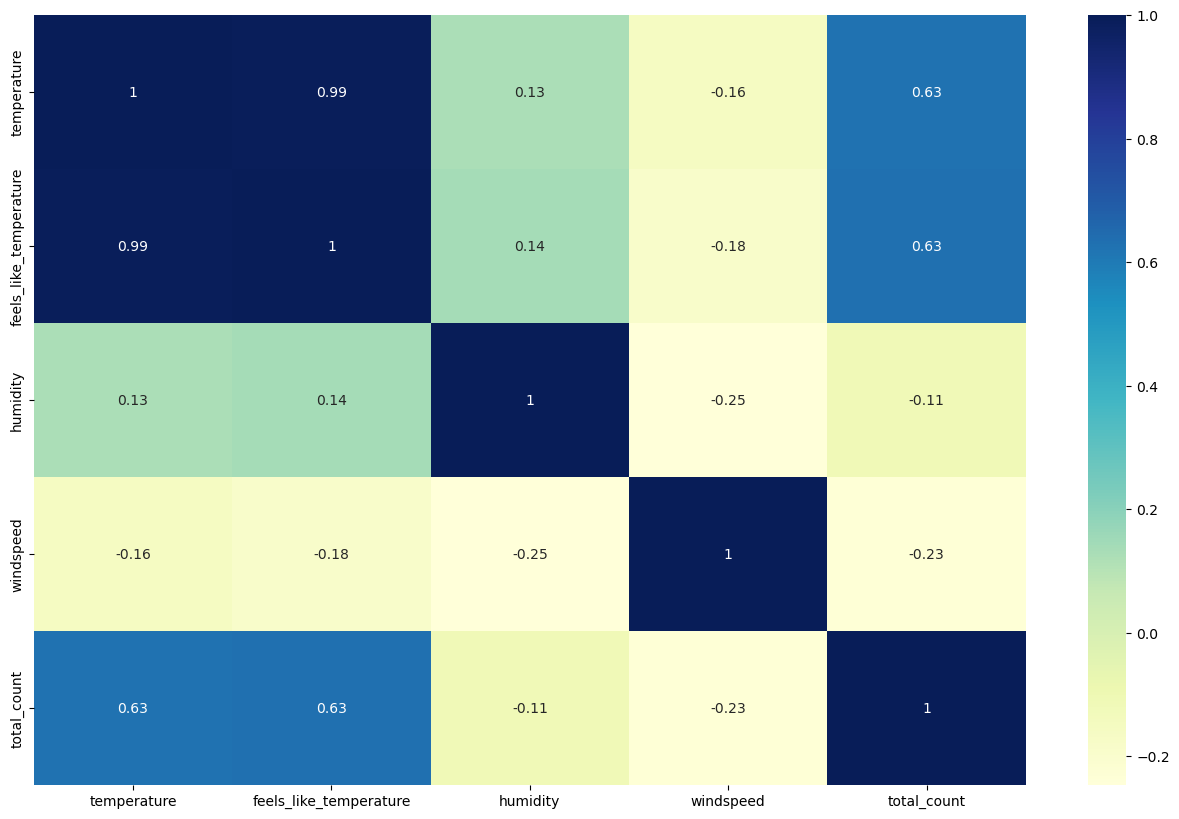

In [38]:
# Correlation coefficients to check which columns are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_sharing_dataset[['temperature','feels_like_temperature','humidity','windspeed','total_count']].corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-success">

**Correlation HeatMap Analysis**:

- **Temperature** (both actual and "feels like") is a strong predictor of bike rentals.
- **Humidity** and **Windspeed** have weaker, negative correlations with bike rentals.
</div>

### Bivariate Analysis (Categorical Features)

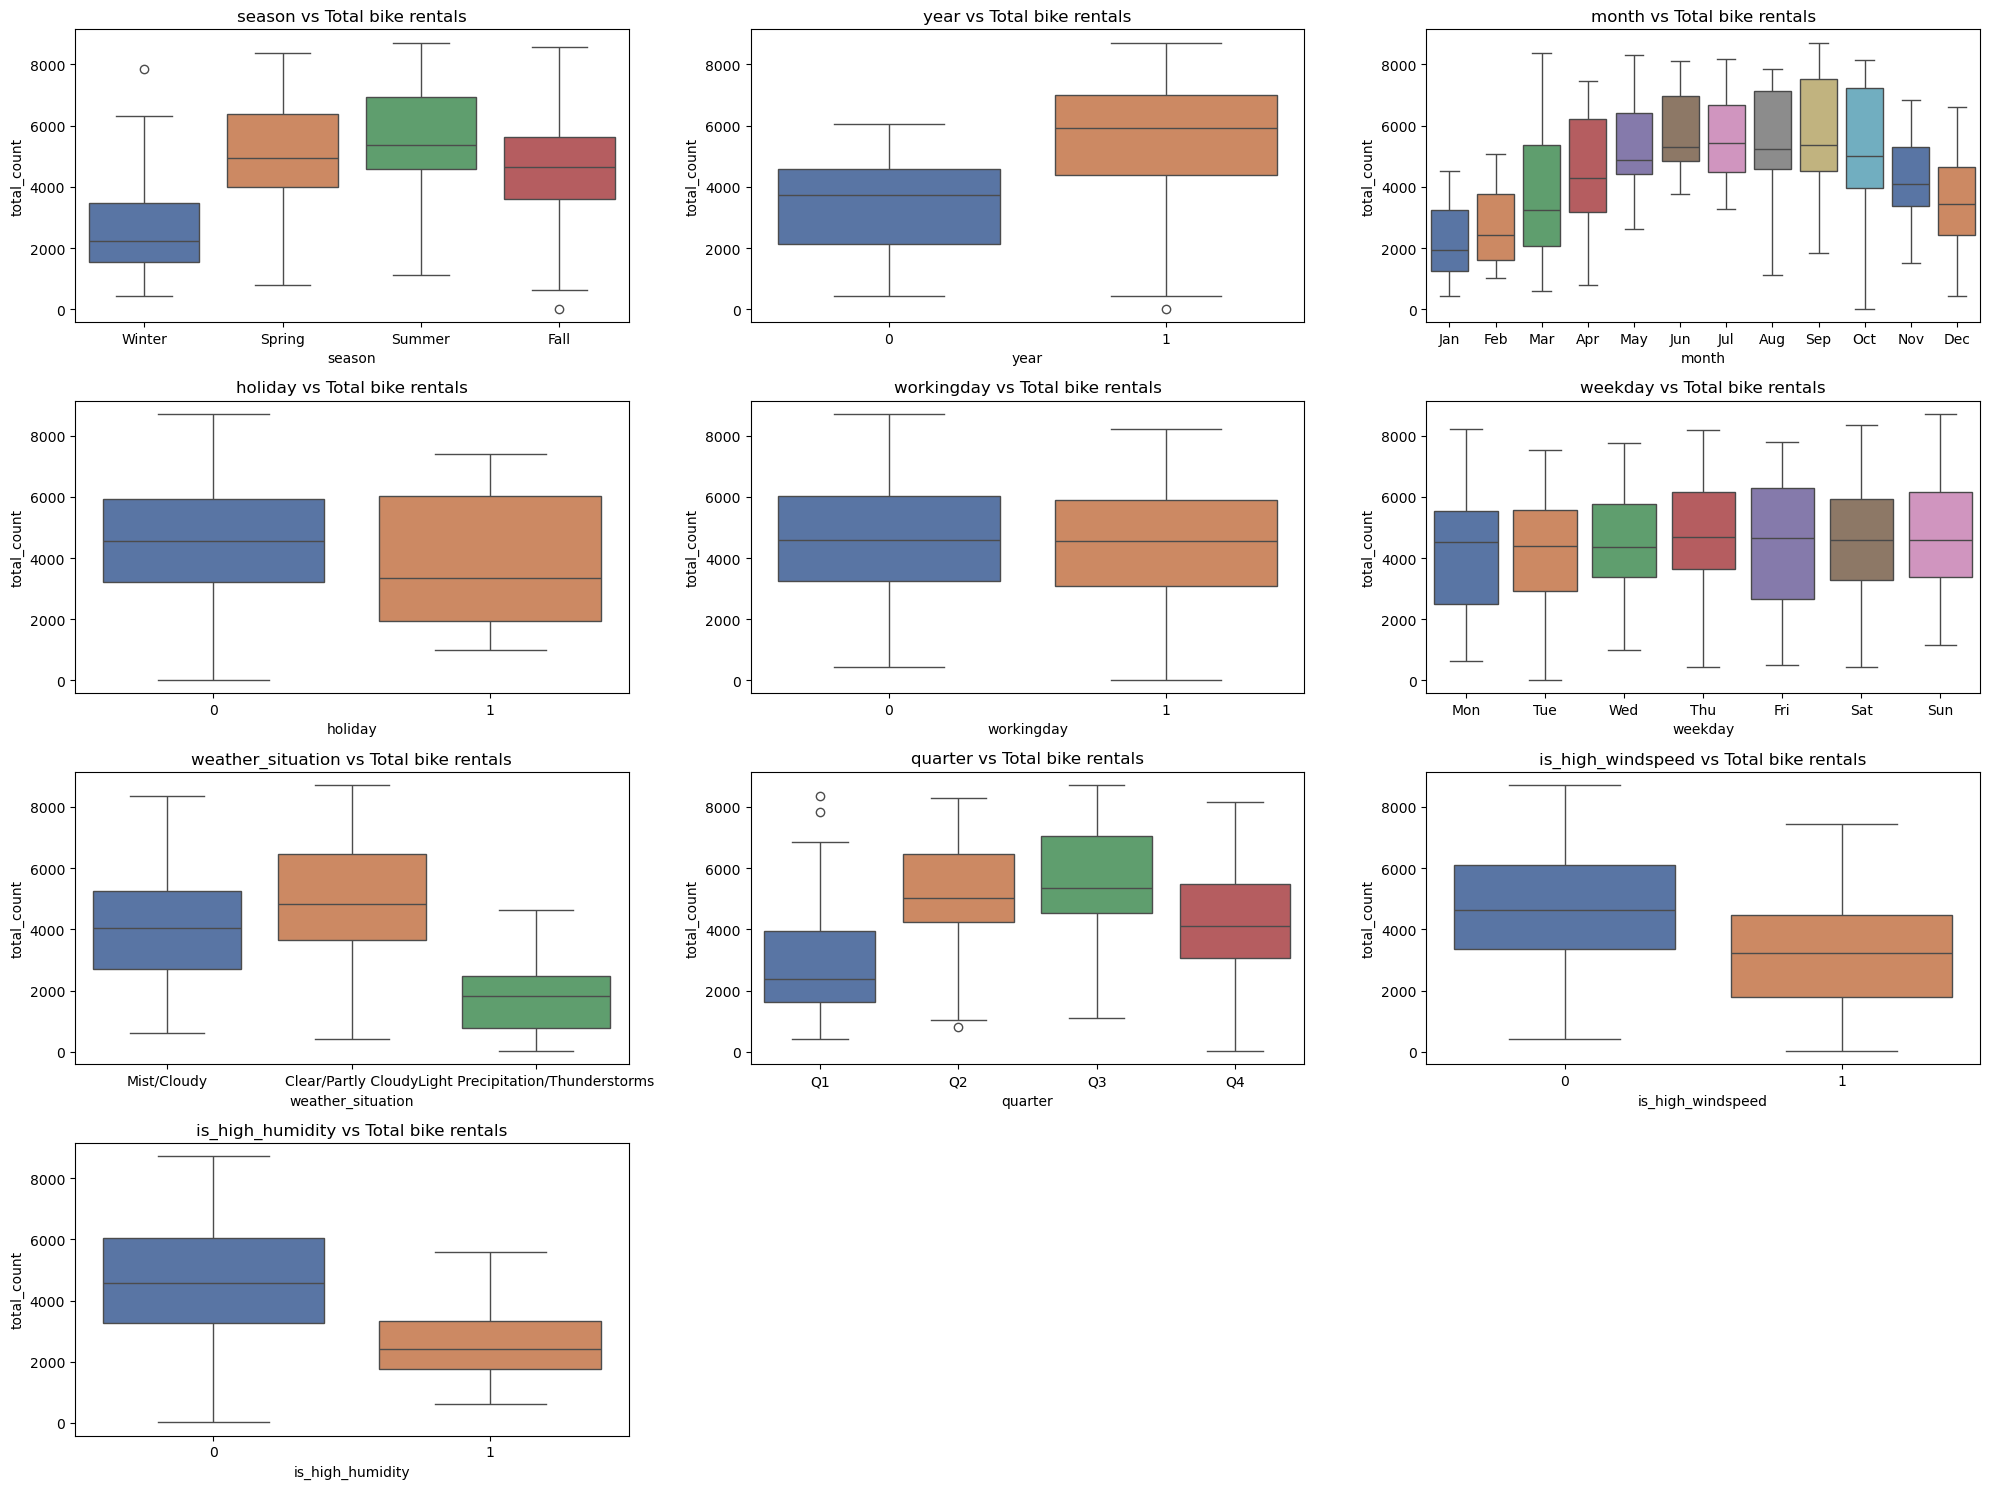

In [39]:
#Categorical variable
categorical_columns = ['season','year', 'month', 'holiday','workingday','weekday','weather_situation','quarter',
                       'is_high_windspeed','is_high_humidity']
plt.figure(figsize=(20, 15))
# Subplot - Boxplot for each categorical feature
# Generate boxplot for each categorical feature in the dataset
for index, categorical_column in enumerate(categorical_columns):
    plt.subplot(4,3,index + 1)
    sns.boxplot(x = categorical_column, y = 'total_count', data = bike_sharing_dataset, 
                hue=categorical_column, palette="deep", legend=False)
    plt.title(f'{categorical_column} vs Total bike rentals')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**BoxPlot Analysis (Categorical Features)**:

**Seasonal Trends:**
* **Summer and Spring** have the highest bike rentals, while **Winter** sees the lowest, showing that warmer temperatures lead to more rentals.

**Yearly Trends:**
* **Rentals increased from 2018 to 2019**, suggesting growing popularity of bike rentals.

**Monthly and Quarterly Trends:**
* Rentals peak between **May and October (Month has Normal Distribution)**, with **Q2 (April to June** and **Q3 (July to September)** being the most popular. **Quarter 1 and Quarter 4** see fewer rentals, particularly during colder months.

**Day and Holiday Trends:**
* Rentals on **holidays** are slightly lower than on non-holidays, indicating more rentals for commuting on regular days. Weekends tend to have higher rentals compared to **holidays**. Rentals are consistent across weekdays, with a slight peak on Thursdays.

**Weather Impact:**
* **Clear or partly cloudy days** see the most rentals, while **light precipitation or thunderstorms** reduce them, indicating that extreme weather conditions reduce bike rentals.

**Other Factors:**
* **High wind speeds** (> 20 m/s) and **high humidity** (> 90%) correlate with fewer rentals.
</div>

---
---
## Multiple Linear Regression

### Dummies

In [40]:
#Before creating dummies, storing original month values for Timeseries Residual Analysis
#We'll remove this column from both the Train and Test datasets after splitting since we won't be creating a dummy for it. 
bike_sharing_dataset['month_residual_analysis'] = bike_sharing_dataset['month']

In [41]:
#columns to create dummy
columns_for_dummy = ['season','month','weekday','weather_situation','quarter']

# Drop the first column using 'drop_first = True' to avoid multicollinearity, as we need n-1 dummy columns for n columns
# Setting dtype as int, So that new dummy values are in 1/0 instead of True/False
bike_sharing_dataset =  pd.get_dummies(data = bike_sharing_dataset, columns=columns_for_dummy, drop_first = True, dtype=int)

In [42]:
print('Columns: ', bike_sharing_dataset.columns) #print columns
print('Shape: ', bike_sharing_dataset.shape) #print shape
bike_sharing_dataset.head()

Columns:  Index(['year', 'holiday', 'workingday', 'temperature',
       'feels_like_temperature', 'humidity', 'windspeed', 'total_count',
       'is_high_windspeed', 'is_high_humidity', 'month_residual_analysis',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed',
       'weather_situation_Light Precipitation/Thunderstorms',
       'weather_situation_Mist/Cloudy', 'quarter_Q2', 'quarter_Q3',
       'quarter_Q4'],
      dtype='object')
Shape:  (729, 36)


,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_count,is_high_windspeed,is_high_humidity,month_residual_analysis,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy,quarter_Q2,quarter_Q3,quarter_Q4
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,Jan,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,Jan,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,Jan,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,Jan,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,Jan,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting the dataset into Training and Test sets

In [43]:
# Splitting the dataset into Training (70% records) and Test sets (30% records) with random_state seed = 100 to ensure reproducibility 
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
# Storing training set's month_residual_analysis for Time Series Residual Analysis later
month_train_residual_analysis = bike_sharing_train['month_residual_analysis']

#Droping month_residual_analysis from Train and Test Dataset,  as we have not created dummy for this column 
bike_sharing_train.drop(columns=['month_residual_analysis'],axis=1,inplace=True)
bike_sharing_test.drop(columns=['month_residual_analysis'],axis=1,inplace=True)

In [45]:
bike_sharing_train.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_count,is_high_windspeed,is_high_humidity,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy,quarter_Q2,quarter_Q3,quarter_Q4
626,1,0,1,22.652500,27.02020,53.6667,14.416725,7591,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
364,0,0,1,16.810000,20.70605,61.5833,14.750318,2485,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


### Scaling

<div class="alert alert-block alert-success">
Since, we don't have much outliers, features have different ranges and not every feature is normally distributed as we saw in above pairplot, we will go with Min-Max Scaling.
</div>

In [46]:
#Going with min-max scaling
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the numeric columns except the boolean and 'dummy' variables
non_bool_num_vars = ['temperature', 'feels_like_temperature', 'humidity', 'windspeed', 'total_count']


# The scaler is first fitted to the data, and then the transformation is applied to the data to ensure all features are on a similar scale.
bike_sharing_train[non_bool_num_vars] = scaler.fit_transform(bike_sharing_train[non_bool_num_vars])

bike_sharing_train.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_count,is_high_windspeed,is_high_humidity,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy,quarter_Q2,quarter_Q3,quarter_Q4
626,1,0,1,0.614763,0.635584,0.450242,0.371638,0.864421,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
364,0,0,1,0.437201,0.461603,0.552447,0.382342,0.247978,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.460736,0.559440,0.255342,0.438851,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.210280,0.381387,0.663106,0.164795,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.411155,0.389456,0.188475,0.457443,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [48]:
bike_sharing_train.describe() #Check statistical info. Specially min and max since, we went with Min-Max Scaling.

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_count,is_high_windspeed,is_high_humidity,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy,quarter_Q2,quarter_Q3,quarter_Q4
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.027451,0.688235,0.540678,0.541209,0.571669,0.318011,0.496352,0.101961,0.029412,0.243137,0.266667,0.243137,0.090196,0.094118,0.066667,0.084314,0.080392,0.074510,0.094118,0.090196,0.082353,0.080392,0.088235,0.139216,0.147059,0.141176,0.137255,0.150980,0.143137,0.021569,0.349020,0.239216,0.258824,0.256863
std,0.500352,0.163554,0.463669,0.225277,0.221255,0.182541,0.170567,0.235715,0.302894,0.169124,0.429398,0.442651,0.429398,0.286744,0.292279,0.249689,0.278131,0.272166,0.262857,0.292279,0.286744,0.275172,0.272166,0.283915,0.346511,0.354512,0.348545,0.344454,0.358381,0.350557,0.145413,0.477128,0.427024,0.438419,0.437332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350497,0.357237,0.431818,0.192829,0.333213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.552927,0.575578,0.296767,0.498008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742223,0.731274,0.704680,0.414082,0.685832,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regression Models

#### Recursive Feature Elimination (RFE)

In [49]:
bike_sharing_train_y = bike_sharing_train.pop('total_count') #y = Target/Dependent Variable
bike_sharing_train_X = bike_sharing_train #X has all feature Independent Variable

In [50]:
# Fit a linear regression model on the training data
linear_model = LinearRegression()
linear_model.fit(bike_sharing_train_X, bike_sharing_train_y) 


# Perform Recursive Feature Elimination (RFE) to select the top 15 features
rfe = RFE(estimator=linear_model, n_features_to_select=15)
rfe = rfe.fit(bike_sharing_train_X, bike_sharing_train_y)

In [51]:
list(zip(bike_sharing_train_X.columns,rfe.support_,rfe.ranking_)) #Display features, shortlisted status, ranking

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temperature', True, 1),
 ('feels_like_temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('is_high_windspeed', False, 17),
 ('is_high_humidity', False, 18),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 20),
 ('month_Dec', False, 8),
 ('month_Feb', False, 3),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 12),
 ('month_Mar', False, 9),
 ('month_May', False, 6),
 ('month_Nov', False, 7),
 ('month_Oct', True, 1),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', False, 19),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 15),
 ('weather_situation_Light Precipitation/Thunderstorms', True, 1),
 ('weather_situation_Mist/Cloudy', True, 1),
 ('quarter_Q2', False, 16),
 ('quarter_Q3', False, 14),
 ('quarter_Q4', False, 2)]

In [52]:
# Features that will be eliminated
bike_sharing_train_X.columns[~rfe.support_]

Index(['workingday', 'is_high_windspeed', 'is_high_humidity', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jun', 'month_Mar', 'month_May',
       'month_Nov', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4'],
      dtype='object')

In [53]:
# Proceeding with RFE 15 selected variables
bike_sharing_train_X_rfe = bike_sharing_train_X[bike_sharing_train_X.columns[rfe.support_]]
bike_sharing_train_X_rfe.head()

,year,holiday,temperature,feels_like_temperature,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_Jan,month_Jul,month_Oct,month_Sep,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy
626,1,0,0.614763,0.635584,0.450242,0.371638,0,1,0,0,0,0,1,0,0
364,0,0,0.437201,0.461603,0.552447,0.382342,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.460736,0.559440,0.255342,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.210280,0.381387,0.663106,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.411155,0.389456,0.188475,1,0,0,0,0,0,0,0,1


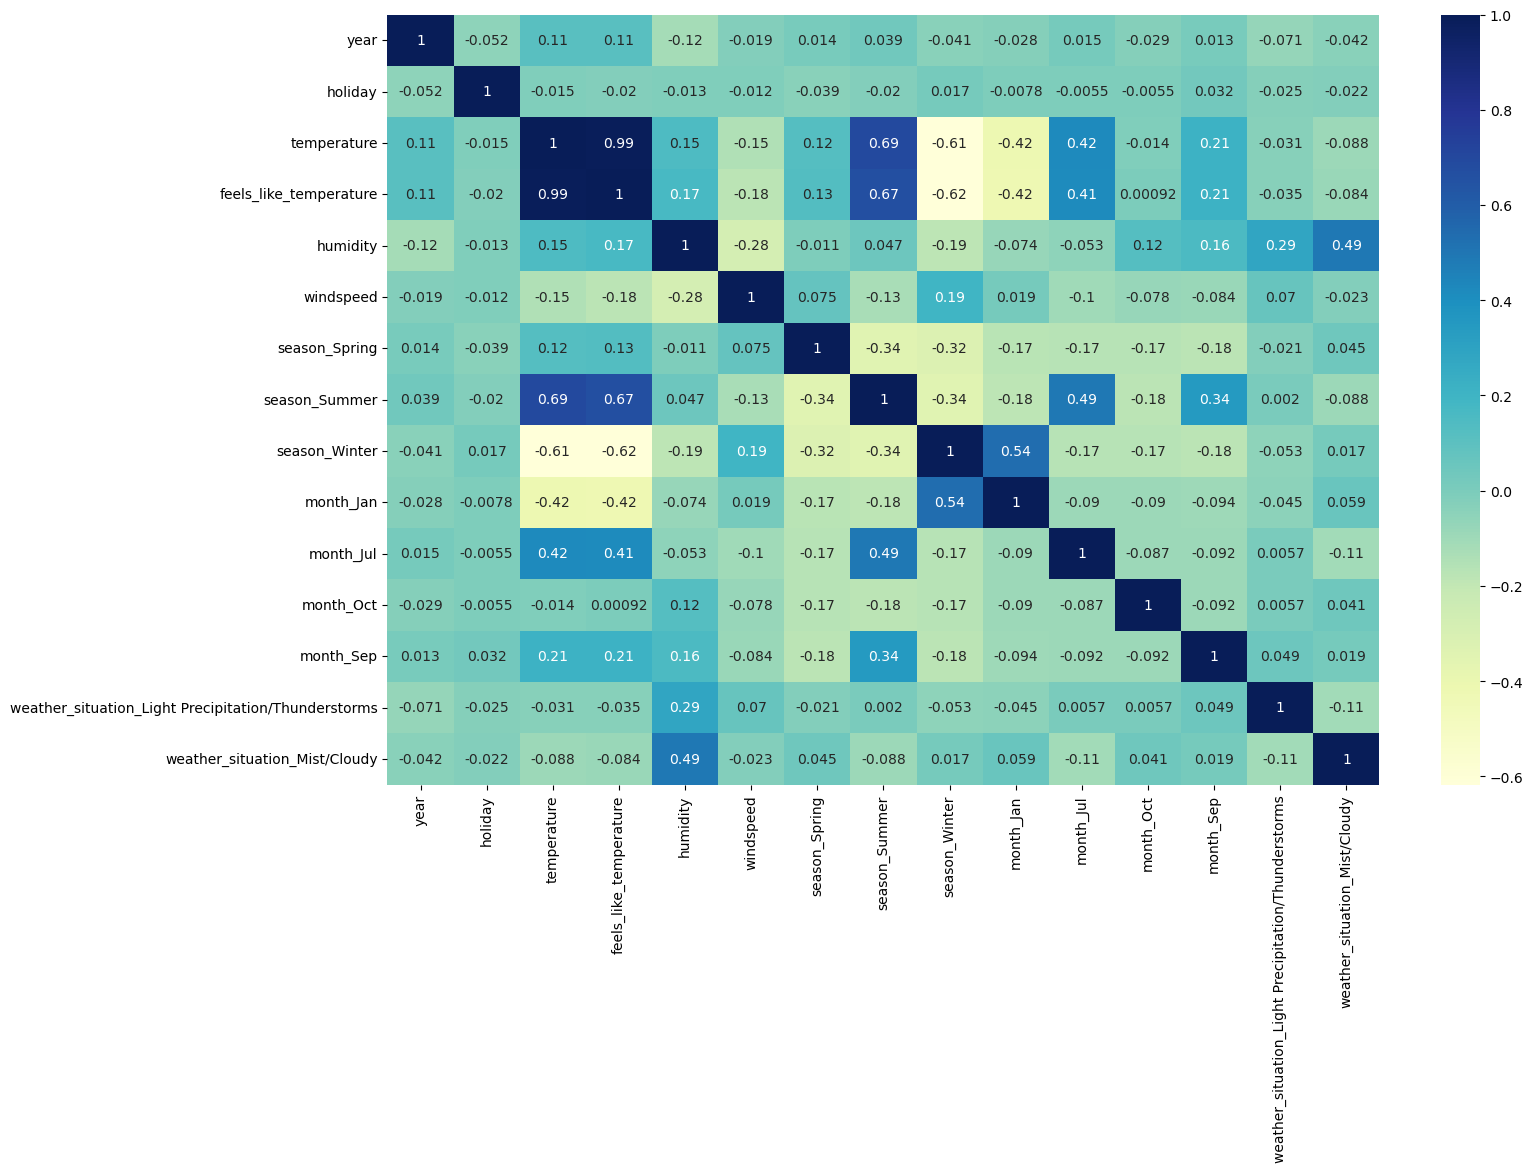

In [54]:
# Correlation coefficients to check which selected features are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_sharing_train_X_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-success">

**Correlation HeatMap Analysis of selected Features (RFE)**:
1. temperature and feels_like_temperature has very high correlation (which is obvious, as feels_like_temperature is derived from temperature).
2. season_Summer has very high correlation with temperature and feels_like_temperature.
3. season_Winter has very high correlation with temperature and feels_like_temperature.
4. July Month has high correlation with temperature and feels_like_temperature.
4. January Month has high correlation with temperature and feels_like_temperature.
5. Temperature and feels_like_temperature is +ve correlated with September Month.
</div>


In [55]:
def create_linear_model(X_train_dataframe, y_train_dataframe, feature_cols):
    X_train_with_constant = sm.add_constant(X_train_dataframe[feature_cols]) # Add a constant (intercept) to the model
    # Fit an Ordinary Least Squares (OLS) linear regression model
    linear_model = sm.OLS(y_train_dataframe, X_train_with_constant).fit()
    print(linear_model.summary()) # Print the model summary
    return linear_model # Return the fitted model


In [56]:
def get_VIF(X_train_dataframe, feature_cols):
    X_train_vif = X_train_dataframe[feature_cols] # Select the specified features from the training data
    
    # Initialize a DataFrame to store VIF values
    vif_df = pd.DataFrame()
    vif_df['Features'] = feature_cols
    
    # Calculate VIF for each feature
    vif_df['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2) # Round VIF values to 2 decimal places
    vif_df = vif_df.sort_values(by="VIF", ascending=False) # Sort features by VIF in descending order    
    return vif_df # Return the DataFrame containing features and their VIF values


#### Model 1 (RFE)

In [57]:
#Columns shortlisted after RFE
selected_feature_cols = bike_sharing_train_X_rfe.columns.to_list()
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'feels_like_temperature',
 'humidity',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Jan',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [58]:
linear_model_1 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.46e-188
Time:                        13:01:40   Log-Likelihood:                 487.00
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     494   BIC:                            -874.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [59]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                             Features     VIF
2                                         temperature  391.89
3                              feels_like_temperature  372.09
4                                            humidity   14.14
7                                       season_Summer    6.01
5                                           windspeed    4.24
6                                       season_Spring    3.18
8                                       season_Winter    2.90
14                      weather_situation_Mist/Cloudy    2.34
0                                                year    2.08
10                                          month_Jul    1.68
9                                           month_Jan    1.60
11                                          month_Oct    1.58
12                                          month_Sep    1.46
13  weather_situation_Light Precipitation/Thunders...    1.29
1                                             holiday    1.04


<div class="alert alert-block alert-success">

Using below thresholds:
1. **p-value above 0.05** meaning feature is **insignificant**.
2. **VIF above 5 meaning feature has higher correlation** with other features/independent variables.
</div>

#### Model 2

`feels_like_temperature` has high P Value (0.635) and VIF (372.09), so we will remove this feature from our model as it is insignificant and highly correlated with other independent variables.

In [60]:
#Remove column 'feels_like_temperature'
selected_feature_cols.remove('feels_like_temperature')
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'humidity',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Jan',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [61]:
linear_model_2 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.14e-189
Time:                        13:01:40   Log-Likelihood:                 486.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     495   BIC:                            -880.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [62]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                             Features    VIF
2                                         temperature  22.59
3                                            humidity  13.73
6                                       season_Summer   5.83
4                                           windspeed   4.15
5                                       season_Spring   3.18
7                                       season_Winter   2.90
13                      weather_situation_Mist/Cloudy   2.33
0                                                year   2.08
9                                           month_Jul   1.67
8                                           month_Jan   1.60
10                                          month_Oct   1.58
11                                          month_Sep   1.46
12  weather_situation_Light Precipitation/Thunders...   1.28
1                                             holiday   1.04


<div class="alert alert-block alert-success">
Since, Adj. R-squared value is same compared to previous model. We will proceed with this model.
</div>

#### Model 3

`month_Jan` has high P Value (0.115), so we will remove this feature from our model as it is insignificant.

In [63]:
#Remove column 'month_Jan'
selected_feature_cols.remove('month_Jan')
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'humidity',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [64]:
linear_model_3 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.21e-189
Time:                        13:01:40   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [65]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                             Features    VIF
2                                         temperature  21.91
3                                            humidity  13.48
6                                       season_Summer   5.73
4                                           windspeed   4.15
5                                       season_Spring   3.14
12                      weather_situation_Mist/Cloudy   2.33
7                                       season_Winter   2.31
0                                                year   2.07
8                                           month_Jul   1.67
9                                           month_Oct   1.58
10                                          month_Sep   1.46
11  weather_situation_Light Precipitation/Thunders...   1.28
1                                             holiday   1.04


<div class="alert alert-block alert-success">
Since, Adj. R-squared value is same compared to previous model. We will proceed with this model.
</div>

<div class="alert alert-block alert-info">

- **Temperature (VIF = 21.91):** This feature has a very high VIF, indicating potential multicollinearity. However, it also has a **strong relationship with the target variable** (total_count), so removing it could **reduce model accuracy**.
- **Humidity (VIF = 13.48):** This is another feature with a **relatively high VIF**, indicating multicollinearity. Let's try removing this feature if multicollinearity is significantly impacting model performance.
</div>

#### Model 4

`humidity` has higher VIF = 13.48, Although temperature has more VIF. But Temperature has highest correlation with Target Variable and thus important feature. So, we will remove `humidity` .

In [66]:
#Remove column 'humidity'
selected_feature_cols.remove('humidity')
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [67]:
linear_model_4 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.84e-185
Time:                        13:01:40   Log-Likelihood:                 472.43
No. Observations:                 510   AIC:                            -918.9
Df Residuals:                     497   BIC:                            -863.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [68]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                             Features    VIF
2                                         temperature  11.84
5                                       season_Summer   5.39
3                                           windspeed   4.14
4                                       season_Spring   3.12
0                                                year   2.07
6                                       season_Winter   2.05
7                                           month_Jul   1.65
8                                           month_Oct   1.56
11                      weather_situation_Mist/Cloudy   1.51
9                                           month_Sep   1.43
10  weather_situation_Light Precipitation/Thunders...   1.05
1                                             holiday   1.04


<div class="alert alert-block alert-success">

Since, Adj. R-squared value **almost similar** compared to previous model **with a very little drop**. We will proceed with this model.</div>

#### Model 5

`season_Spring` has high P Value (0.076), so we will remove this feature from our model as it is insignificant.

In [69]:
#Remove column 'season_Spring'
selected_feature_cols.remove('season_Spring')
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'windspeed',
 'season_Summer',
 'season_Winter',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [70]:
linear_model_5 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.87e-186
Time:                        13:01:40   Log-Likelihood:                 470.81
No. Observations:                 510   AIC:                            -917.6
Df Residuals:                     498   BIC:                            -866.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [71]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                             Features   VIF
2                                         temperature  7.12
3                                           windspeed  4.06
4                                       season_Summer  3.22
0                                                year  2.07
6                                           month_Jul  1.63
5                                       season_Winter  1.59
10                      weather_situation_Mist/Cloudy  1.51
8                                           month_Sep  1.40
7                                           month_Oct  1.18
9   weather_situation_Light Precipitation/Thunders...  1.05
1                                             holiday  1.03


<div class="alert alert-block alert-success">Since, Adj. R-squared value is same compared to previous model. We will proceed with this model.</div>

#### Model 6

<div class="alert alert-block alert-warning">

- Since, VIF of temperature (7.12) is still higher than 5, but as temperature has very high correlation with target variable we cannot drop it. 
- Since, next highest VIF is windspeed and, although within threshold of p-value and VIF, might be contributing to multicollinearity. 
- We will try to remove windspeed and check whether model still holds good Adj. R squared value.</div>

In [72]:
#Remove column 'season_Winter'
selected_feature_cols.remove('windspeed')
selected_feature_cols

['year',
 'holiday',
 'temperature',
 'season_Summer',
 'season_Winter',
 'month_Jul',
 'month_Oct',
 'month_Sep',
 'weather_situation_Light Precipitation/Thunderstorms',
 'weather_situation_Mist/Cloudy']

In [73]:
linear_model_6 = create_linear_model(X_train_dataframe = bike_sharing_train_X_rfe, y_train_dataframe = bike_sharing_train_y, 
                                   feature_cols = selected_feature_cols) # Create a Linear Regression Model and print Summary

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.11e-181
Time:                        13:01:40   Log-Likelihood:                 457.23
No. Observations:                 510   AIC:                            -892.5
Df Residuals:                     499   BIC:                            -845.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [74]:
print(get_VIF(X_train_dataframe = bike_sharing_train_X_rfe, feature_cols = selected_feature_cols)) #Print VIF (Variance Inflation Factor)

                                            Features   VIF
2                                        temperature  4.54
3                                      season_Summer  3.13
0                                               year  2.06
5                                          month_Jul  1.62
9                      weather_situation_Mist/Cloudy  1.50
7                                          month_Sep  1.40
4                                      season_Winter  1.25
6                                          month_Oct  1.18
1                                            holiday  1.03
8  weather_situation_Light Precipitation/Thunders...  1.03


<div class="alert alert-block alert-success">

Adj. R Squared value of model **hasn't dropped much**. So, we will continue with this model.</div>

<div class="alert alert-block alert-success">

Model 6 Summary:
1. All the predictors in model 6 have very low p-values (much less than 0.05), indicating that they all contribute significantly to the model.
2. All the predictors in model 6 have low VIF (less than 5), indicating multicollinearity is not a problem in this model.
</div>


`Multiple Linear Regression Equation:`<br>
total_count = 0.1822  + (0.4878 * temperature) + (0.2433 * year) - (0.2777 * weather_situation_Light_Precipitation_Thunderstorms) - (0.1476 * season_Winter) + (0.0925 * month_Sep) - (0.0802 * weather_situation_Mist_Cloudy) - (0.0743 * holiday) + (0.0609 * month_Oct) - (0.0449 * season_Summer) - (0.0418 * month_Jul)






### Residual Analysis

In [75]:
# Checking predictions
bike_sharing_train_X_final=sm.add_constant(bike_sharing_train_X_rfe[selected_feature_cols])
bike_sharing_train_pred = linear_model_6.predict(bike_sharing_train_X_final)

In [76]:
error_residuals = bike_sharing_train_y - bike_sharing_train_pred

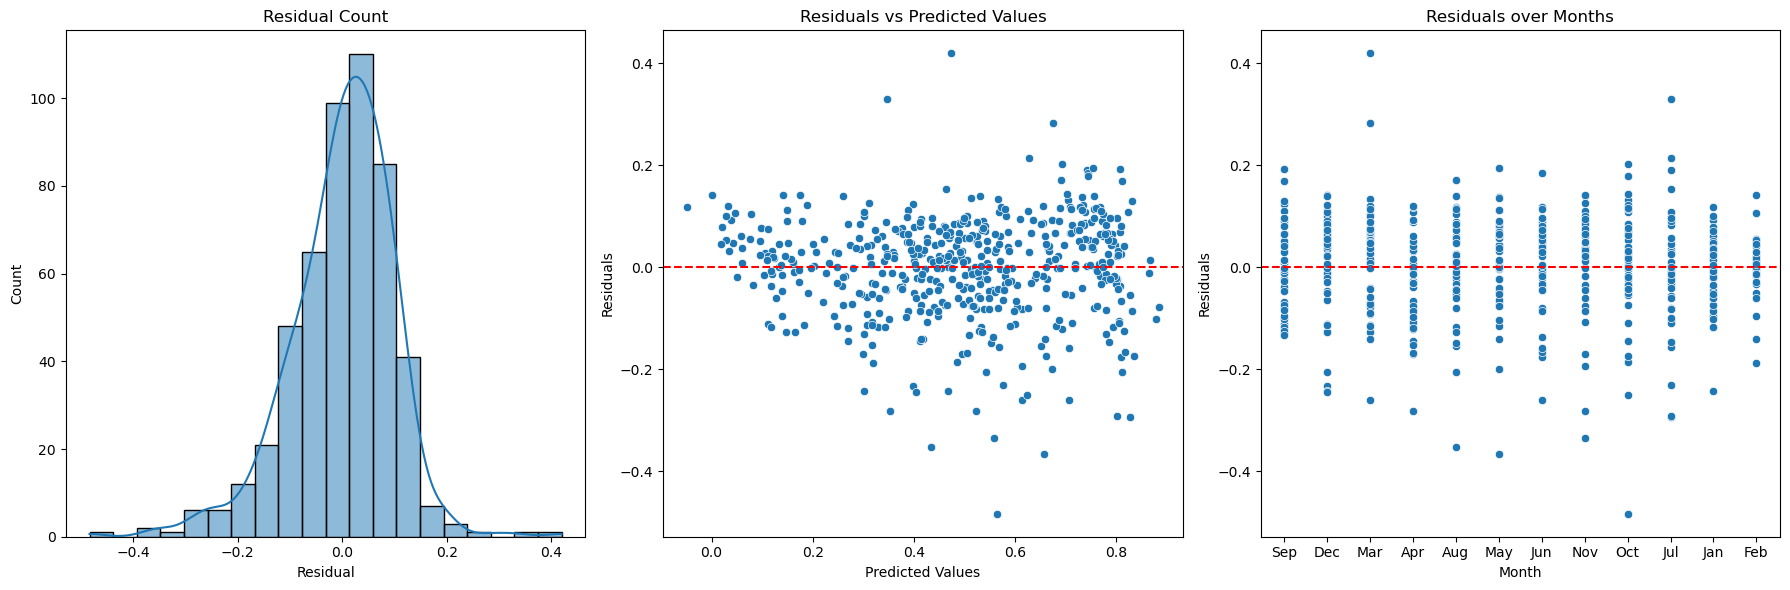

In [77]:
# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Histogram of the error terms using displot
sns.histplot(error_residuals, bins=20, kde=True, ax=axes[0])  # kde=True adds the kernel density estimate
axes[0].set_title('Residual Count')  # Plot heading 
axes[0].set_xlabel('Residual')  # X-label

# Plot 2: Residuals vs Predicted Values
axes[1].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(x=bike_sharing_train_pred, y=error_residuals, ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

# Plot 3: Residuals over months
axes[2].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(x=month_train_residual_analysis, y=error_residuals, ax=axes[2])
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals over Months')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

<div class="alert alert-block alert-success">

**Residual Analysis:**
- **Normality of Residuals:** The histogram with KDE (Kernel Density Estimate) indicates that the residuals are approximately normally distributed, centered around zero. This suggests the normality assumption is satisfied.
- **Linearity and Homoscedasticity:** The residuals vs predicted values plot shows that residuals are fairly randomly scattered around zero with no clear funnel shape, indicating that the linearity and homoscedasticity assumptions (Constant Variance of Errors) are met.
- **Residual Independence:** The residuals over months plot does not show a strong pattern, indicating residuals to be independent of each other (no correlation between errors).
</div>

### Transforming Test Dataset

In [78]:
# Transforming all the numeric columns except the boolean and 'dummy' variables
non_bool_num_vars = ['temperature', 'feels_like_temperature', 'humidity', 'windspeed', 'total_count']

bike_sharing_test[non_bool_num_vars] = scaler.transform(bike_sharing_test[non_bool_num_vars])

bike_sharing_test.head()

,year,holiday,workingday,temperature,feels_like_temperature,humidity,windspeed,total_count,is_high_windspeed,is_high_humidity,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy,quarter_Q2,quarter_Q3,quarter_Q4
185,0,0,1,0.856704,0.850415,0.519634,0.180484,0.511167,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
639,1,0,1,0.662528,0.638242,0.882733,0.133655,0.508028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
300,0,0,0,0.338555,0.330295,0.513716,0.402389,0.400338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
222,0,0,0,0.820361,0.788671,0.304464,0.263333,0.526500,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
153,0,0,0,0.698871,0.699963,0.214632,0.453215,0.589279,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [79]:
bike_sharing_test_y = bike_sharing_test.pop('total_count') #y = Target/Dependent Variable
bike_sharing_test_X = bike_sharing_test #X has all feature Independent Variable
bike_sharing_test_X = bike_sharing_test_X[selected_feature_cols] #Only use selected feature columns used in our final model

### Making Predictions

In [80]:
# Adding a constant variable 
bike_sharing_test_X = sm.add_constant(bike_sharing_test_X)
bike_sharing_test_X.head()

,const,year,holiday,temperature,season_Summer,season_Winter,month_Jul,month_Oct,month_Sep,weather_situation_Light Precipitation/Thunderstorms,weather_situation_Mist/Cloudy
185,1.0,0,0,0.856704,1,0,1,0,0,0,0
639,1.0,1,0,0.662528,0,0,0,1,0,1,0
300,1.0,0,0,0.338555,0,0,0,1,0,0,1
222,1.0,0,0,0.820361,1,0,0,0,0,0,0
153,1.0,0,0,0.698871,0,0,0,0,0,0,0


In [81]:
# Making predictions
bike_sharing_test_pred = linear_model_6.predict(bike_sharing_test_X)
bike_sharing_test_pred.head()

185    0.513444
639    0.531968
300    0.328141
222    0.537552
153    0.523168
dtype: float64

### R Squared Analysis

In [82]:
r2_score(bike_sharing_test_y, bike_sharing_test_pred) #R Squared value on the Test Dataset

0.8111274028883122

In [83]:
r_squared_train = r2_score(bike_sharing_train_y, bike_sharing_train_pred) #R Squared value on the Training Dataset
r_squared_test = r2_score(bike_sharing_test_y, bike_sharing_test_pred) #R Squared value on the Test Dataset

# Difference in R Squared value on the Test Dataset
r_squared_difference = r2_score(bike_sharing_train_y, bike_sharing_train_pred) - r2_score(bike_sharing_test_y, bike_sharing_test_pred)

print('R Squared:')
print('Training Dataset:',r_squared_train)
print('Test Dataset:',r_squared_test)
print('Difference:',r_squared_difference)

R Squared:
Training Dataset: 0.8242502341766647
Test Dataset: 0.8111274028883122
Difference: 0.013122831288352454


<div class="alert alert-block alert-success">

R-squared value on the test dataset is **very close to that on the training dataset (0.824 vs 0.811) suggests that the model is well-balanced**. It has not overfitted to the training data, and it performs almost similarly on unseen data.
</div>

### Visualizing Test Predictions

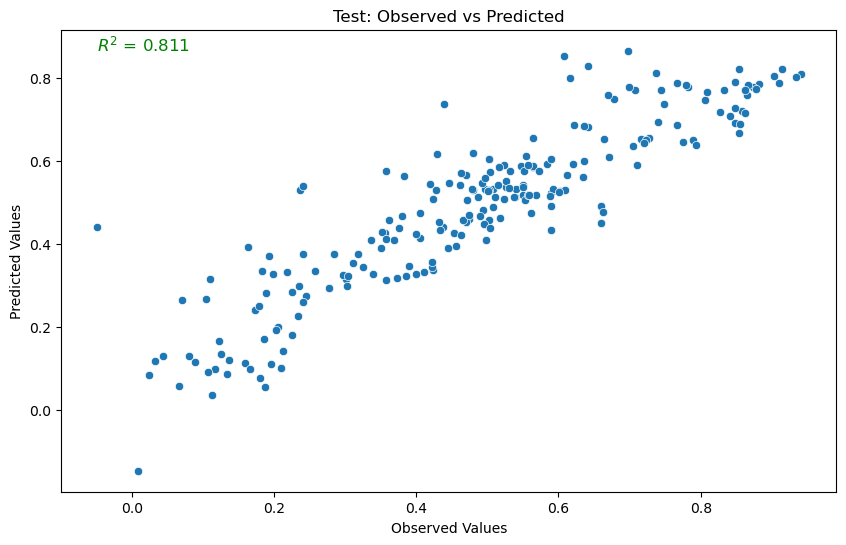

In [84]:
#Regression plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=bike_sharing_test_y, y=bike_sharing_test_pred)

plt.title('Test: Observed vs Predicted') 
plt.xlabel('Observed Values')                 
plt.ylabel('Predicted Values')


# Annotate the R-squared value on the plot
plt.text(min(bike_sharing_test_y), max(bike_sharing_test_pred), f'$R^2$ = {r_squared_test:.3f}', fontsize=12, color='green')
plt.show()

---
---
## Major Insights from the Model:

1. **Positive Impact Factors**:
   - **Temperature (0.4878)**: Warmer temperatures significantly increase bike rentals.
   - **Year (0.2433)**: Bike rentals increase over time, indicating growing demand.
   - **Month: September (0.0925)** and **October (0.0609)**: These months see higher rentals, suggesting seasonality benefits.
  
2. **Negative Impact Factors**:
   - **Weather: Light Precipitation/Thunderstorms (-0.2777)** and **Mist/Cloudy (-0.0802)**: Poor weather conditions reduce bike rentals significantly.
   - **Season: Winter (-0.1476)**: Winter has a stronger negative impact.
   - **Holiday (-0.0743)**: Rentals are lower on holidays, potentially due to reduced commuter traffic.

## Suggested Next Business Steps:

1. **Maximize Opportunities During Warm Weather:**
   - **Boost Marketing Efforts:** Ramp up promotions in warmer months, especially September, highlighting the comfort of riding in pleasant weather.
   - **Expand Fleet and Services:** Consider expanding bikes or adding more rental locations to meet the growing demand during warmer climate.

2. **Minimize Impact of Poor Weather:**
   - **Flexible Options:** Introduce rain check policies and weather-related insurance to keep customers engaged despite bad weather.
   - **Weather Gear Rentals:** Offer rentals for weather-resistant gear and provide discounts on mildly bad weather days to maintain usage.

3. **Increase Winter Rentals:**
   - **Winter Promotions:** Launch campaigns like “Winter Warm-Up Rides” with bundled deals or discounts. Collaborate with warm indoor venues for end-of-ride perks.
   
4. **Boost Rentals on Holidays:**
   - **Holiday Specials:** Target tourists and leisure riders with holiday-specific deals, guided tours, and special events to encourage more holiday rentals.

5. **Yearly Rental Growth:** 
   - **Expansion** - Consider expanding bikes or adding more rental locations to meet the growing demand.